In [ ]:
import glob
import os
import pickle
import xml.etree.ElementTree as ET
from os import listdir, getcwd
from os.path import join

dirs = ['annotations']
classes = ['helmet', 'head']

def getImagesInDir(dir_path):
    image_list = []
    for filename in glob.glob(dir_path + '/*.xml'):
        image_list.append(filename)

    return image_list

def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def convert_annotation(dir_path, output_path, image_path):
    basename = os.path.basename(image_path)
    basename_no_ext = os.path.splitext(basename)[0]

    in_file = open(dir_path + '/' + basename_no_ext + '.xml')
    out_file = open(output_path + basename_no_ext + '.txt', 'w')
    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
        bb = convert((w,h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')

cwd = getcwd()

for dir_path in dirs:
    full_dir_path = r"C:\Users\admin\Desktop\annotations"
    output_path = full_dir_path +'/yolo/'

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    image_paths = getImagesInDir(full_dir_path)
    list_file = open(full_dir_path + '.txt', 'w')

    for image_path in image_paths:
        list_file.write(image_path + '\n')
        convert_annotation(full_dir_path, output_path, image_path)
    list_file.close()

    print("Finished processing: " + dir_path)

In [58]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline
from sklearn.cluster import KMeans

img=cv.imread(r"C:\Users\admin\Desktop\Capture.PNG")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    v=[]
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
        print(perc[i])
        v.append(perc[i])
    perc = dict(sorted(perc.items()))
    v.sort()
    print(v[2])
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

0.17
0.24
0.59
0.59
{0: 0.59, 1: 0.17, 2: 0.24}
[[ 42.95836735  23.22122449  23.24326531]
 [195.08898305 199.48163842 200.1440678 ]
 [ 66.89        80.652      106.261     ]]


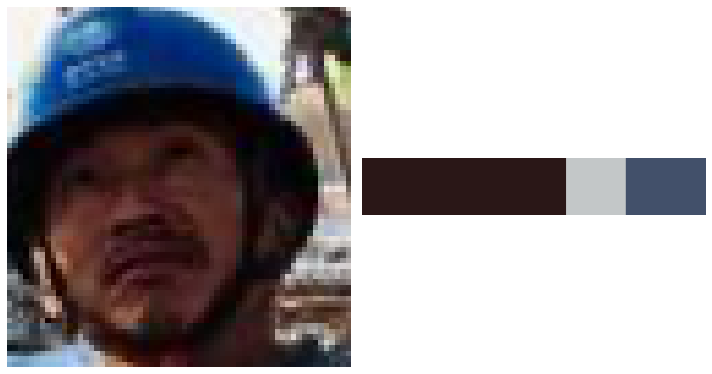

In [59]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()
# clt_1 = clt.fit(img.reshape(-1, 3))
# show_img_compar(img, palette(clt_1))
clt = KMeans(n_clusters=3)
#clt.fit(img)
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_1))

In [43]:
img=cv.imread(r"C:\Users\admin\Desktop\Capture.PNG")
img.shape

(46, 42, 3)

In [44]:
img=img.reshape(-1,2)
img.shape

(2898, 2)

In [55]:
a=[3444,3232343,1,2]
a.sort()
a


[1, 2, 3444, 3232343]